In [324]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [325]:
points = [(0, 0), (1, 1), (2, 3), (-1, 2.5)]

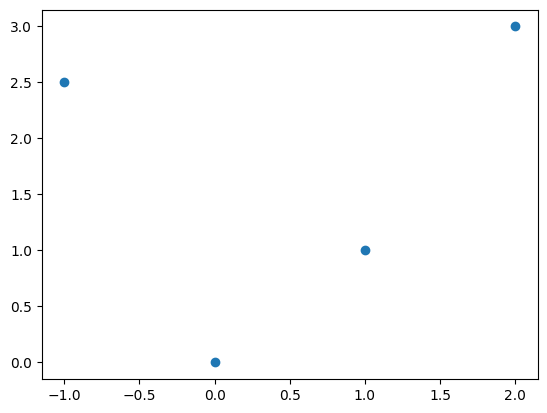

In [326]:
plt.scatter([x[0] for x in points], [x[1] for x in points])
plt.show()

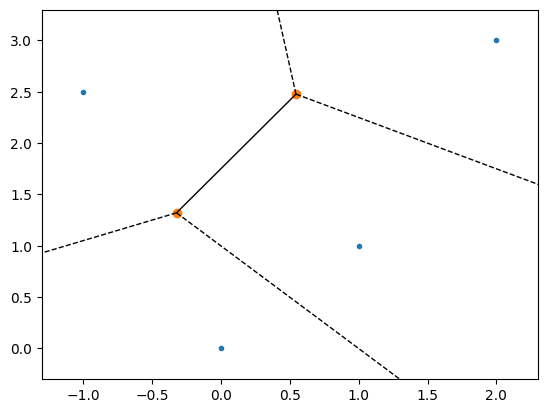

In [327]:
def Voronoi():
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.spatial import Voronoi, voronoi_plot_2d

    # example of point
    p1x = 0
    p1y = 0
    p2x = 1
    p2y = 1
    p3x = 2
    p3y = 3
    p4x = -1
    p4y = 2.5

    # This vector will include all the points of your Voronoi diagram
    fullvec = []
    fullvec.append([p1x, p1y])
    fullvec.append([p2x, p2y])
    fullvec.append([p3x, p3y])
    fullvec.append([p4x, p4y])

    # convert the list to a numpy array
    points = np.array(fullvec)

    # use the Voronoi library
    vor = Voronoi(points)
    voronoi_plot_2d(vor)
    plt.show()


Voronoi()

In [328]:
# from datatypes import Point, Arc
# from datatypes import Arc
from datatypes import Point

In [329]:
def getParabolaCrossPoint(focus1, focus2, dirY):
    # -- extract x and y coordinates of the foci:
    p1x, p1y = focus1.x, focus1.y
    p2x, p2y = focus2.x, focus2.y

    f1, f2 = abs(dirY-p1y)/2, abs(dirY-p2y)/2

    a1, a2 = -1/(4*f1), -1/(4*f2)
    b1, b2 = -2*p1x*a1, -2*p2x*a2
    c1, c2 = p1x*p1x*a1 + p1y + f1, p2x*p2x*a2 + p2y + f2
    a, b, c = a1-a2, b1-b2, c1-c2

    d = b*b-4*a*c
    if d >= 0:
        # x1 = (-b-math.sqrt (d))/(2*a)
        x2 = (-b + np.sqrt(d))/(2*a)
        # -- calculate the y-coordinate of the intersection point using the equation of the first parabola:
        y = a1*x2*x2 + b1*x2 + c1
        # -- return the intersection point coordinates (just left one):
        return x2, y

In [330]:
# %pip install sympy

In [331]:
def find_parabola_intersection(p0, p1, d):
    x1, y1 = p0.x, p0.y
    x2, y2 = p1.x, p1.y
    # Calculate the intersection points
    y_intersections = [(y1 + y2) / 2]

    # Calculate corresponding x values
    x_intersections = [x1 - (y1 - y_inter) ** 2 / (4 * (y1 - d))
                       for y_inter in y_intersections]

    # Return the intersection points as tuples
    intersections = list(zip(x_intersections, y_intersections))

    return intersections

In [332]:
# class parabola:
#     def __init__(self, focus):
#         self.focus = focus
#         self.directrix = focus.y

#     def unitValue(self, x):
#         if self.focus.y == self.directrix:
#             return np.inf
#         return 1.0 / (2*(self.focus.y - self.directrix)) * (x - self.focus.x)**2 + (self.focus.y + self.directrix)/2.0

#     def value(self, directrix, x):
#         self.directrix = directrix
#         return [self.unitValue(x) for x in x]

In [333]:
focus1 = Point(0, 0)
focus2 = Point(2, 3)
directrix = -1

In [334]:
class Arc:
    directrix: float

    def __init__(self, focus):
        self.focus = focus
        self.circle_event: Event = None

    @classmethod
    def setDirectrix(cls, directrix):
        cls.directrix = directrix

    def __unit_val(self, x):
        if self.focus.y == self.directrix:
            return self.focus.y
        f = abs(self.focus.y - self.directrix)/2.0
        vertex = Point(self.focus.x, self.focus.y - f)
        self.a = 1.0 / (4*f)
        self.b = -vertex.x / (2*f)
        self.c = vertex.x**2 / (4*f) + vertex.y
        return self.a*x**2 + self.b*x + self.c
        # return x**2/(4*f) + -vertex.x*x/(2*f) + vertex.x**2/(4*f) + vertex.y
        # return 1.0 / (2*(self.focus.y - self.directrix)) * (x - self.focus.x)**2 + (self.focus.y + self.directrix)/2.0

    def value(self,  x, directrix=None):
        if directrix is not None:
            self.setDirectrix(directrix)
        # self.directrix = directrix
        return [self.__unit_val(x) for x in x]

    def intersect(self, arc) -> Point:
        a = self.a - arc.a
        b = self.b - arc.b
        c = self.c - arc.c
        x = (-b + np.sqrt(b**2 - 4*a*c))/(2*a)
        return Point(x, self.__unit_val(x))

In [335]:
# p1 = parabola(focus1)
# p2 = parabola(focus2)
lower = Arc(focus1)
higher = Arc(focus2)
lower.setDirectrix(5)
print(higher.directrix)

5


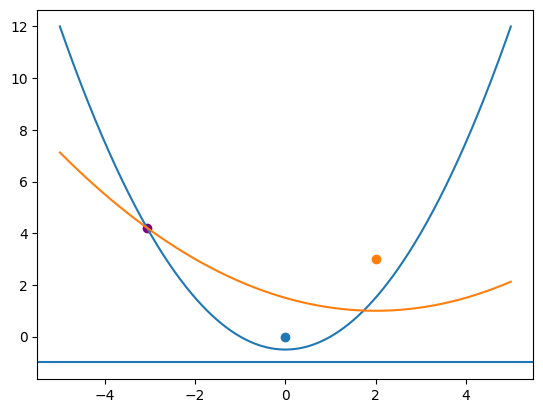

In [336]:
x = np.linspace(-5, 5, 1000)
plt.scatter([focus1.x], [focus1.y])
plt.scatter([focus2.x], [focus2.y])
Arc.setDirectrix(directrix)
plt.plot(x, lower.value(x))
plt.plot(x, higher.value(x))
# plt.plot(x, higher.value(directrix, x))
plt.axhline(directrix)
# for directrix in [-1, -2, -3, -4, -5]:
# inter = find_parabola_intersection(focus1, focus2, directrix)
inter1 = lower.intersect(higher)
# if inter is not None:
# print(inter)
#     inter = inter[0]
# plt.scatter([inter[0]], [inter[1]])
# plt.scatter([inter1.x], [inter1.y],color='red')
inter2 = higher.intersect(lower)
plt.scatter([inter2.x], [inter2.y], color='purple')
plt.show()
# intersection = getParabolaCrossPoint(focus1, focus2, directrix)
# plt.scatter([intersection[0]], [intersection[1]])

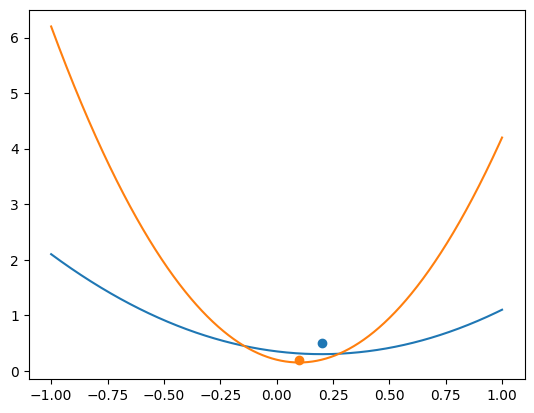

In [73]:
plt.scatter([focus1[0]], [focus1[1]])
plt.scatter([focus2[0]], [focus2[1]])
k = 0.1
y = lower.value(k, x)
y2 = higher.value(k, x)
plt.plot(x, y)
plt.plot(x, y2)
plt.show()

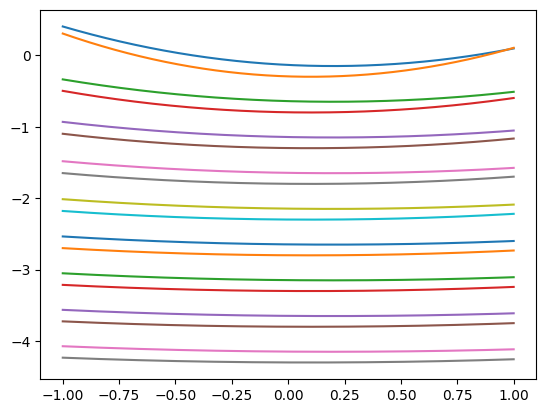

In [75]:
for k in np.arange(focus2[1]-1, focus2[1]-10, -1):
    y = lower.value(k, x)
    y2 = higher.value(k, x)
    plt.plot(x, y)
    plt.plot(x, y2)
plt.show()